# Crop Production

# Aim

The main goal of Exploratory Data Analysis is to identify errors in data sets. Give a better understanding about the relationship between various attributes in the dataset. Thus, we will be able to schedule all the other processes accordingly.

# Data Explanation

State_Name : Name of the respective states in India. 

District_Name : Name of the respective Districts in India. 

Crop_Year : Data is recorded in between the year of 2000 - 2014. 

Season : This include all the season that is present in various part of the India.

Crops : The variety of Crops that are grown in different part of India during different seasons.

Area : Area at which a particular crop is grown during a particular time of the year and the unit is in hectare.

Production : Production is total harvest measured in tons per hectare

# Seasons and Duration

Kharif : Kharif crops are sown early-May – usually at the beginning of the first monsoon rains.
    
Rabi : Rabi crops are sown around mid-November – preferably after the monsoon rains.
    
Whole Year : Throughout the Year.
    
Summer : April to June
    
Winter : December to January
    
Autumn : September and October

In [1]:

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'A:\crop\crop_production.csv')

In [3]:
df.head(20).style.background_gradient(cmap='rainbow').hide_index()

State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.000000,2000.000000
Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.000000,1.000000
Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.000000,321.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.000000,641.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.000000,165.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.000000,65100000.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.000000,100.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.000000,2.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.000000,15.000000
Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.000000,169.000000


In [4]:
df.shape

(246091, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
#if we will check percentage of missing data set 
3730/246091

0.015156994770227274

its means only 1% of the data is so we can drop the missing values 

In [8]:
df.dropna(inplace=True)
#df.dropna(subset=["Production"],axis=0,inplace=True)

In [9]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [10]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

checking is there any correaltionship between the columns 

<AxesSubplot:>

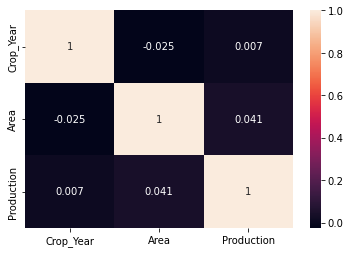

In [11]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True)

In [12]:
df.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [13]:
Prod_N= df.groupby(by = 'State_Name')['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False)
Prod_N

C:\Users\Manis\AppData\Local\Temp/ipykernel_14352/404001368.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Prod_N= df.groupby(by = 'State_Name')['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False)


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


<AxesSubplot:xlabel='Production', ylabel='State_Name'>

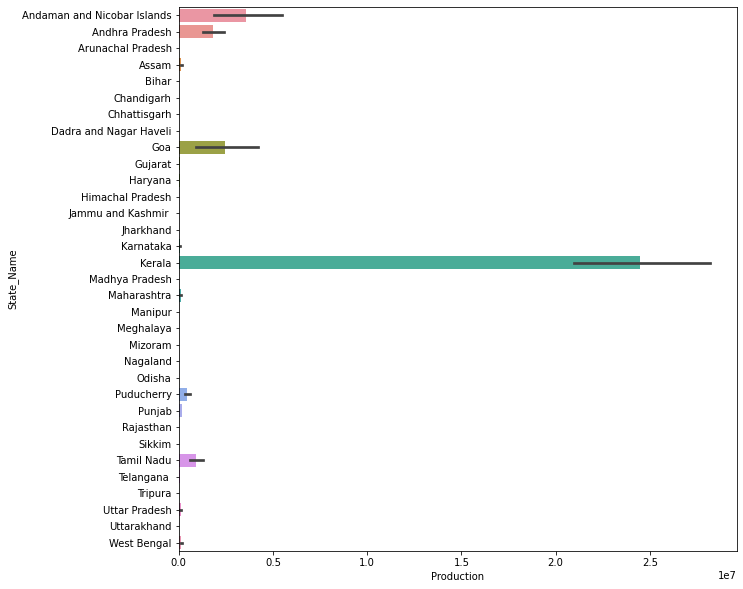

In [14]:
plt.figure(figsize= (10,10))
sns.barplot(x=df['Production'],y= df["State_Name"], orient='h')

as we can see that the kerla has the highest production

In [15]:
print(df.Crop.nunique())

124


In [16]:
print(df.Crop.max())


other oilseeds


In [17]:
print(df.Crop.value_counts().head())

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64


In [18]:
print(df.Crop_Year.nunique())
print(df.Crop_Year.min())
print(df.Crop_Year.max())
print(df.Crop_Year.value_counts())

19
1997
2015
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


There is 19 years of data in the dataset started  from 1997 to 2015.
Top years are 2003, 2002, 2007–08 and 2006

# Exploratory Analysis and Visualization

In [19]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


(array([2.42347e+05, 6.00000e+00, 5.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.00000000e-01, 1.71602008e+06, 3.43204006e+06, 5.14806004e+06,
        6.86408002e+06, 8.58010000e+06]),
 <BarContainer object of 5 artists>)

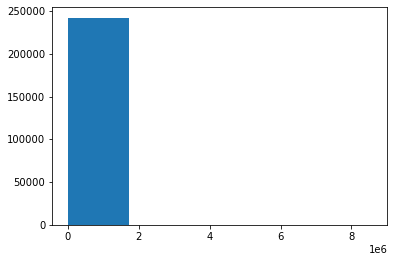

In [20]:
plt.hist(df.Area, bins = 5)

(array([2.42229e+05, 1.04000e+02, 2.80000e+01]),
 array([0.00000000e+00, 4.16933333e+08, 8.33866667e+08, 1.25080000e+09]),
 <BarContainer object of 3 artists>)

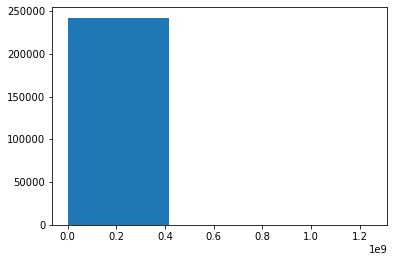

In [21]:
plt.hist(df.Production, bins = 3)

Now we are saving the states to zone-wise 

In [22]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [23]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [24]:
df.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

In [25]:
print(df.Crop.unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Moth' 

Now we can see that there are different different crops which are having same category so we categorise that accordingly

In [26]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets',
              'Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ',
              'Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic',
              'Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard',
              'Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

# Zone Wise Production

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Zone-Wise Production: Total')

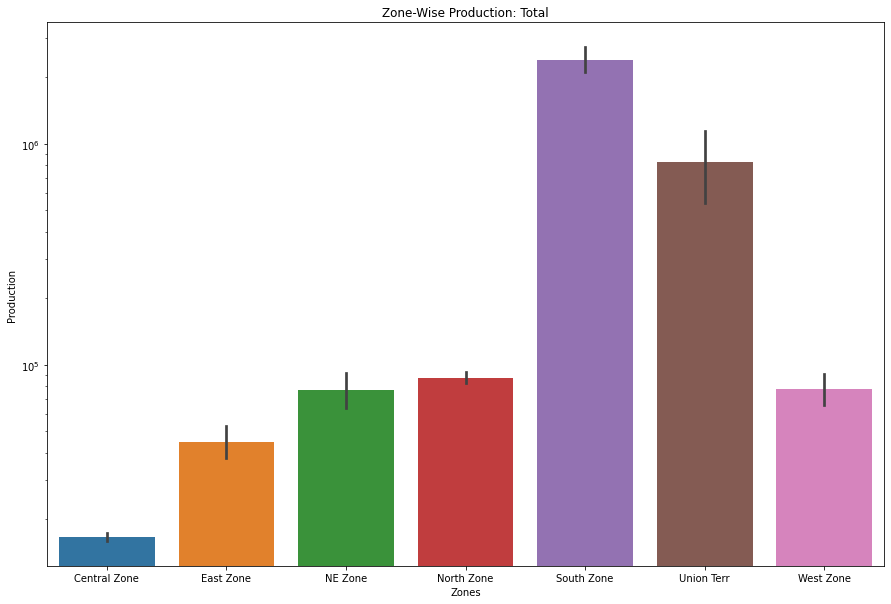

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df.Zones.sort_values(ascending=True), df.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

As we can see that south zone has heighest number of production

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Southern-Zone Production')

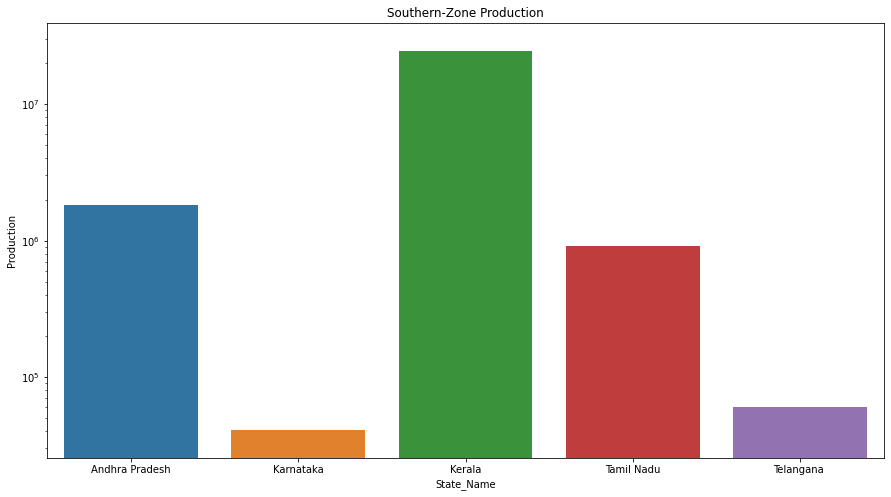

In [28]:
south_zone =  df[(df["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

Looking at the chart we can see that top South Indian states are Kerala, Andhra Pradesh and Tamil Nadu

In [29]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr,Nuts
...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,East Zone,Cereal
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,East Zone,oilseeds
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,East Zone,Commercial
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,East Zone,Cereal


Now we can check overall/heighest crop production 

# Overall Crops vs Production

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall Crops vs Production')

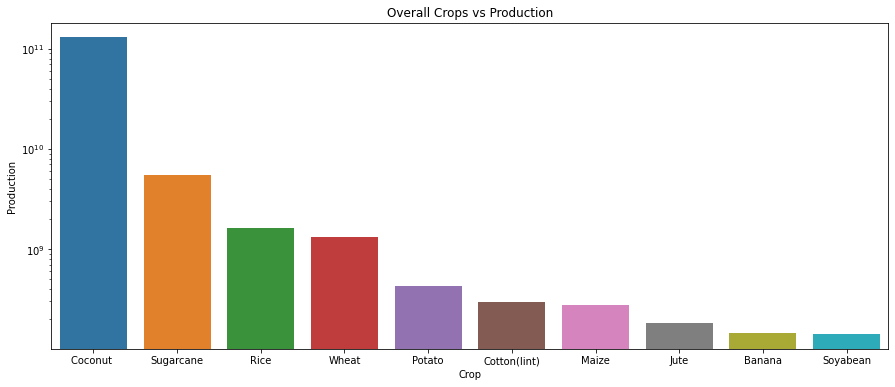

In [30]:

crop = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

Top Crops Production wise are --->> Coconut, Sugarcane and Rice

# Year wise

<AxesSubplot:xlabel='Crop_Year'>

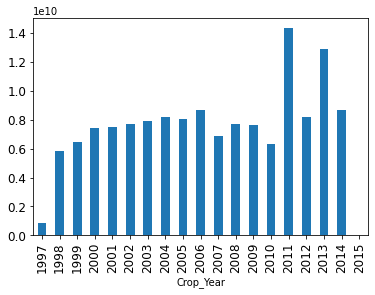

In [31]:
plt.tick_params(labelsize=12)
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

High productive years are 2011, 2013 and 2014 

# Season wise Production

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal Crops vs Production')

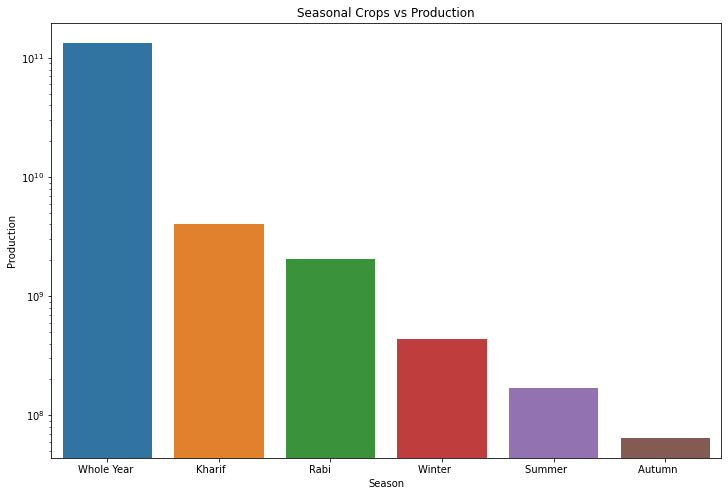

In [32]:
df_season=df.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

Top crop categories which shows high production values are Whole Year, Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoons

# Crop wise Production

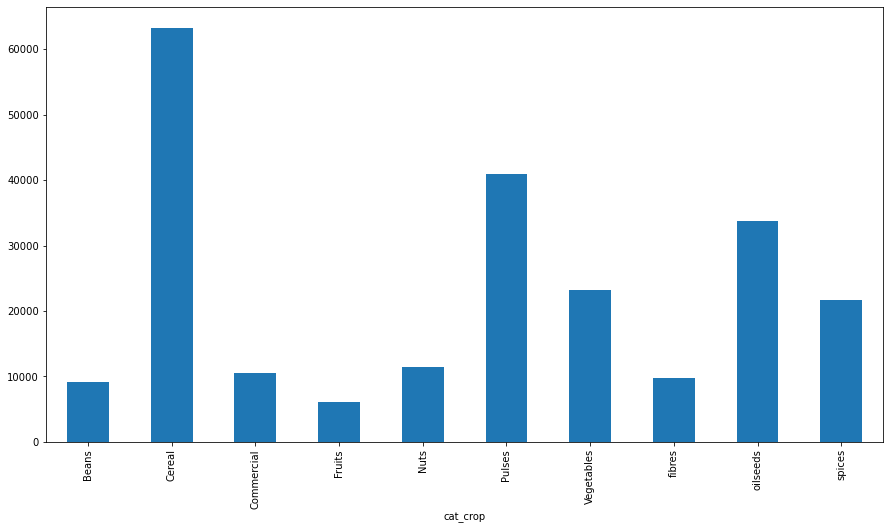

In [33]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
df.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

Top crop categories are Cereal, Pulses and Oilseeds

# Crop Categories

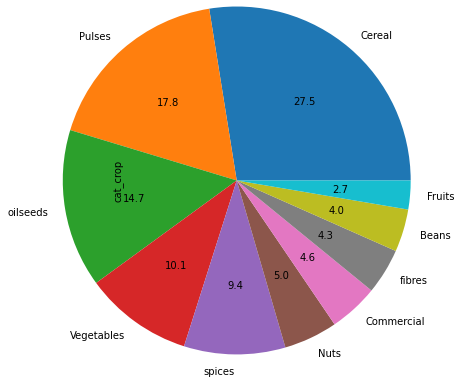

In [34]:
df1=df["cat_crop"].value_counts()
df1.plot(radius=2,kind="pie",autopct="%1.1f")
plt.tick_params(labelsize=10)

In [35]:
df_2 = pd.crosstab(df['State_Name'], df['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


<AxesSubplot:xlabel='State_Name'>

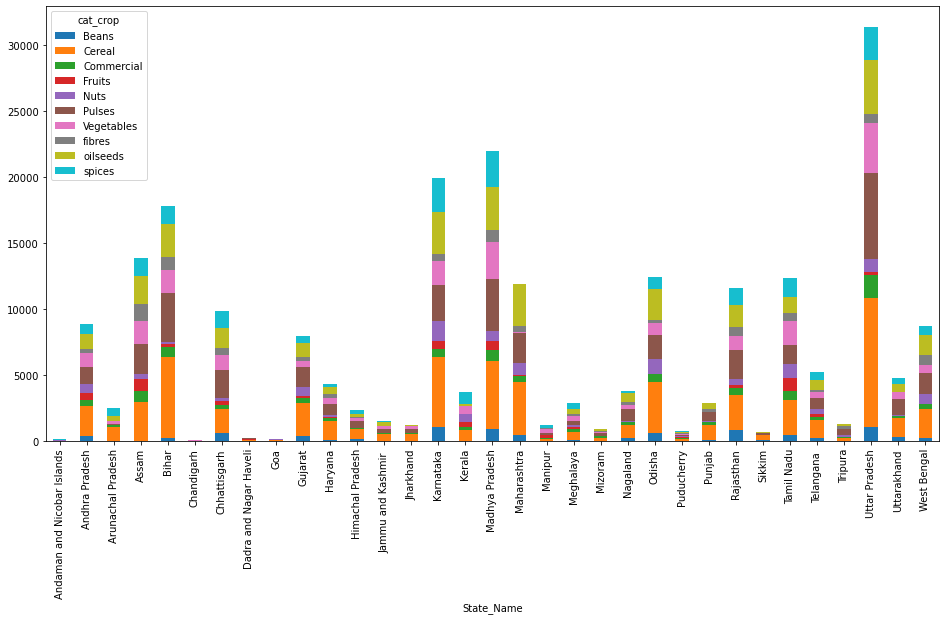

In [36]:
df_2.plot(kind='bar', stacked=True, figsize = (16,8))

Uttar Pradesh  producing more crop categories than any other Indian state

In [37]:
df["Crop"].value_counts()[:]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

# Rice

In [38]:
Rice_df = df[df["Crop"]=="Rice"]
print(Rice_df.shape)
Rice_df[:10]

(15082, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Union Terr,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Union Terr,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Union Terr,Cereal
45,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Rice,2.09,12.06,Union Terr,Cereal
64,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Rice,3.50,10.00,Union Terr,Cereal
81,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Kharif,Rice,10779.00,31863.00,Union Terr,Cereal
92,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Kharif,Rice,9718.00,27033.00,Union Terr,Cereal
98,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Kharif,Rice,6854.30,18995.62,Union Terr,Cereal


C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

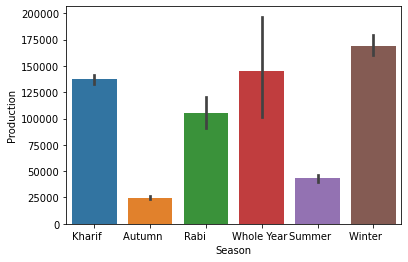

In [39]:
sns.barplot("Season","Production",data=Rice_df)

It shows that rice needs winter to grow 

In [40]:
top_rice_pro_dis = Rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:10]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:15]


,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794
325,KRISHNA,20280606.0,1.263219
90,BIRBHUM,19753571.0,1.230391
347,LUDHIANA,18950000.0,1.180339
386,MURSHIDABAD,18403217.0,1.146282
214,GUNTUR,18245831.0,1.136479


C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


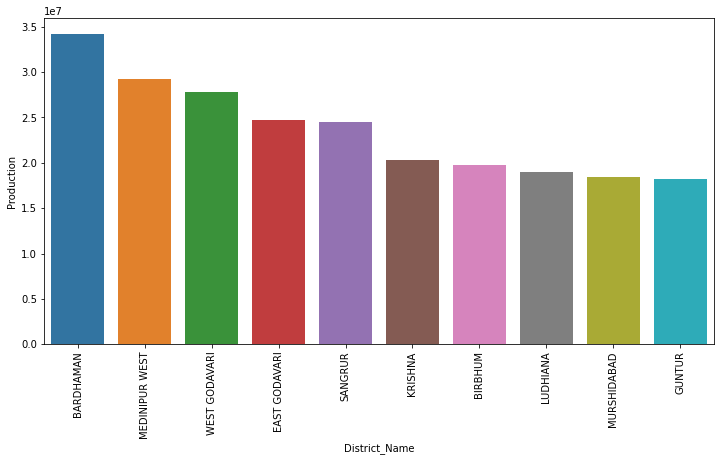

In [41]:
plt.figure(figsize=(12,6))
sns.barplot("District_Name","Production",data=top_rice_pro_dis[:10])
plt.xticks(rotation=90)
plt.show()


District wise its BARDHAMAN, MEDINIPUR WEST and WEST GODAVARI which contributes to total rice production

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


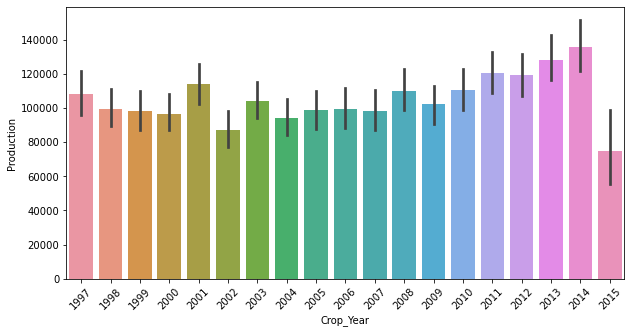

In [42]:
plt.figure(figsize=(10,5))
sns.barplot("Crop_Year","Production",data=Rice_df)
plt.xticks(rotation=45)
plt.show()

There is highest production in 2014

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


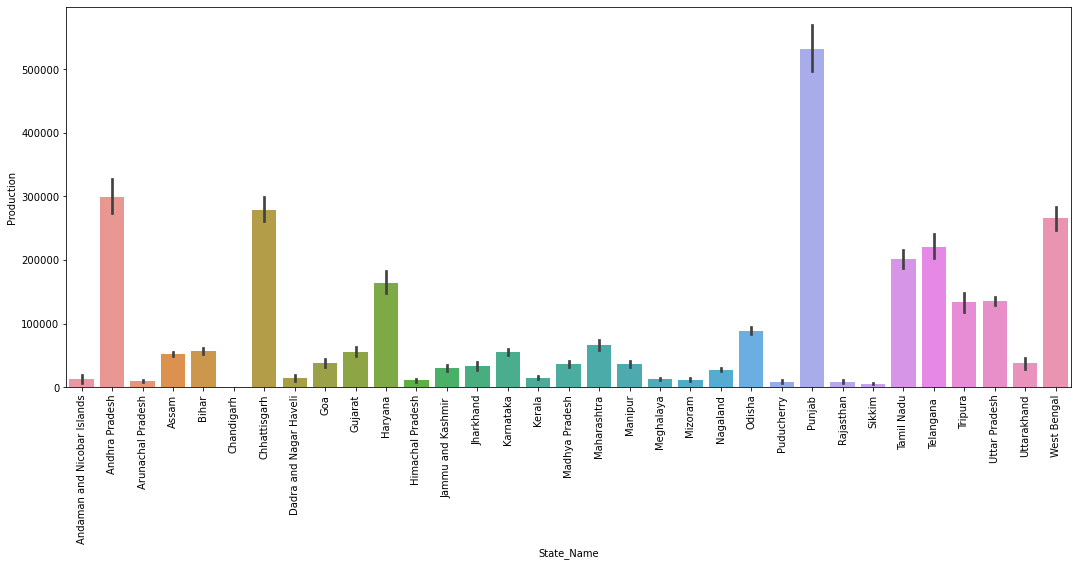

In [43]:
plt.figure(figsize=(18,7))
sns.barplot("State_Name","Production",data=Rice_df)
plt.xticks(rotation=90)
plt.show()

Statewise Punjab dominates in rice production

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


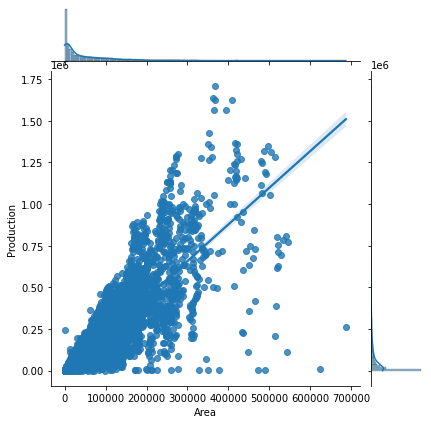

In [44]:
sns.jointplot("Area","Production",data=Rice_df,kind="reg")

When we check the frequency of the crop it shows rice is grown heavily in India

its shows the positive correlation as the area increase the production also increase

# Coconut 

In [45]:
coco=df[df["Crop"]=="Coconut "]

print(coco.shape)

(1958, 9)


<AxesSubplot:xlabel='Season', ylabel='Production'>

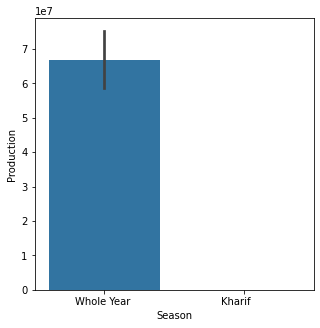

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(x='Season',y='Production',data=coco)

The production of coconut is whole year

In [61]:
top_coco = coco.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coco[:10]
sum_max = top_coco["Production"].sum()
top_coco["precent_of_pro"] = top_coco["Production"].map(lambda x:(x/sum_max)*100)
top_coco[:20]




,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379
43,EAST GODAVARI,8.214998e+09,6.320122
69,KASARAGOD,7.730637e+09,5.947484
74,KOLLAM,7.140793e+09,5.493694
105,PALAKKAD,6.359585e+09,4.892680
44,ERNAKULAM,5.016205e+09,3.859165


C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


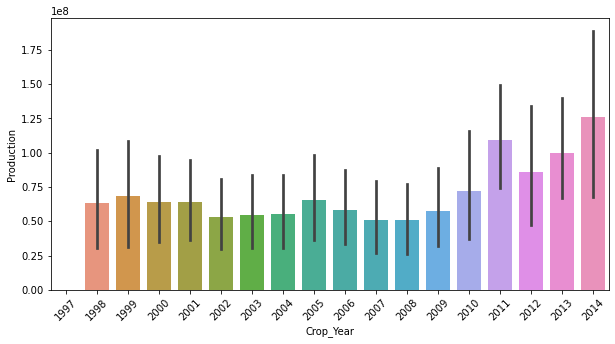

In [47]:
plt.figure(figsize=(10,5))
sns.barplot("Crop_Year","Production",data=coco)
plt.xticks(rotation=45)
plt.show()

The production of coconut as crop_year wise --->>

highest production in 2014

lowest production in 2002

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


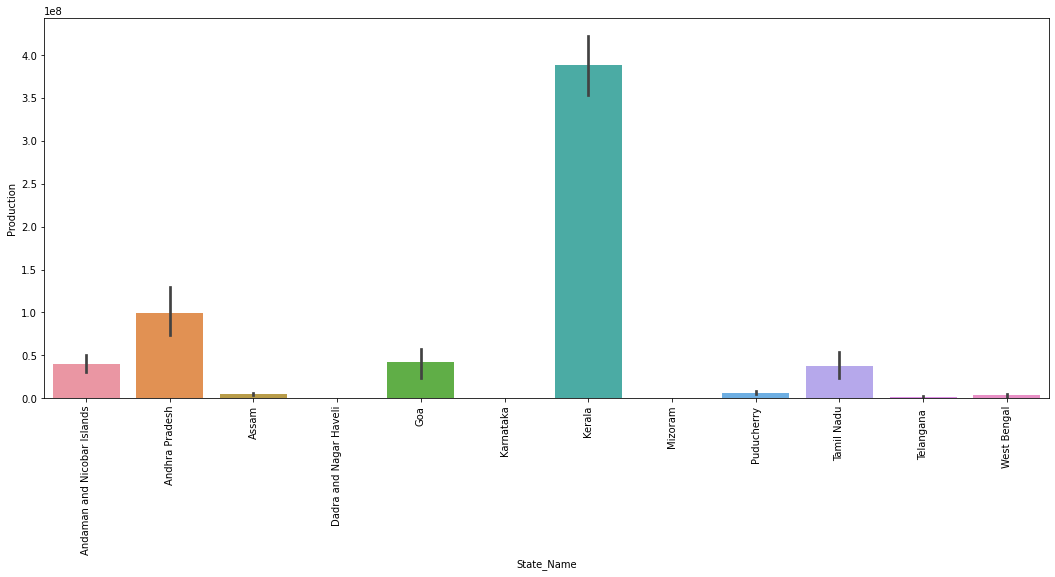

In [48]:
plt.figure(figsize=(18,7))
sns.barplot("State_Name","Production",data=coco)
plt.xticks(rotation=90)
plt.show()

Kerala was the highest producer of coconut

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


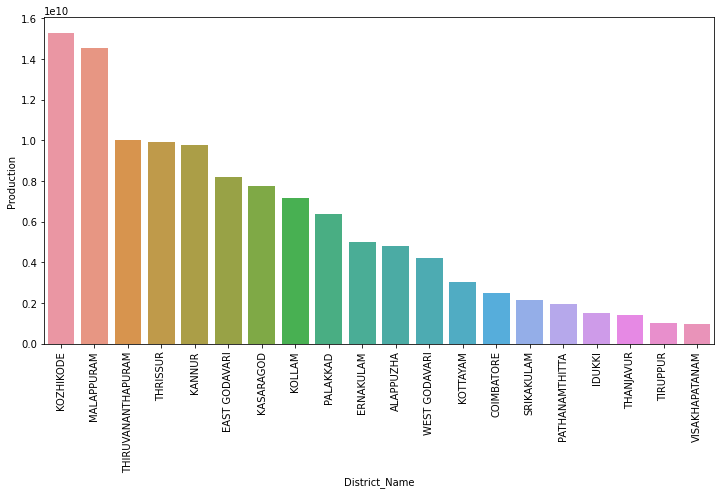

In [65]:

plt.figure(figsize=(12,6))
sns.barplot("District_Name","Production",data=top_coco[:20])
plt.xticks(rotation=90)
plt.show()


Highest production of coconut as District wise was Kozhikode

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


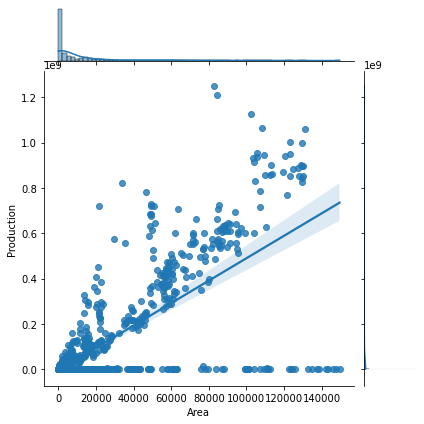

In [50]:
sns.jointplot("Area","Production",data=coco,kind="reg")

We we check the graph we found there is lesser correaltion, because as the area increase the production of some area are still zero

# Sugarcane

In [51]:
sug=df[df["Crop"]=="Sugarcane"]
sug

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Union Terr,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Union Terr,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Union Terr,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Union Terr,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Union Terr,Commercial
...,...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,East Zone,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,East Zone,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,East Zone,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,East Zone,Commercial


<AxesSubplot:xlabel='Season', ylabel='Production'>

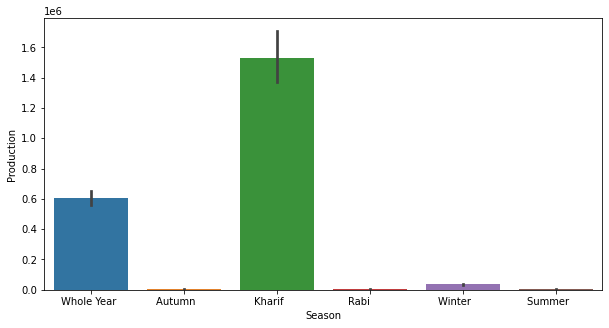

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x='Season',y='Production',data=sug)

From the above graph we can see that the sugurcane is kharif crop

In [66]:
top_sug = sug.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug[:10]
sum_max = top_sug["Production"].sum()
top_sug["precent_of_pro"] = top_sug["Production"].map(lambda x:(x/sum_max)*100)
top_sug[:20]


,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947
348,MEERUT,151829820.0,2.742748
447,SAHARANPUR,143273838.0,2.588188
493,SOLAPUR,139645167.0,2.522637
555,VILLUPURAM,132702030.0,2.397212
418,PUNE,127473301.0,2.302757


C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


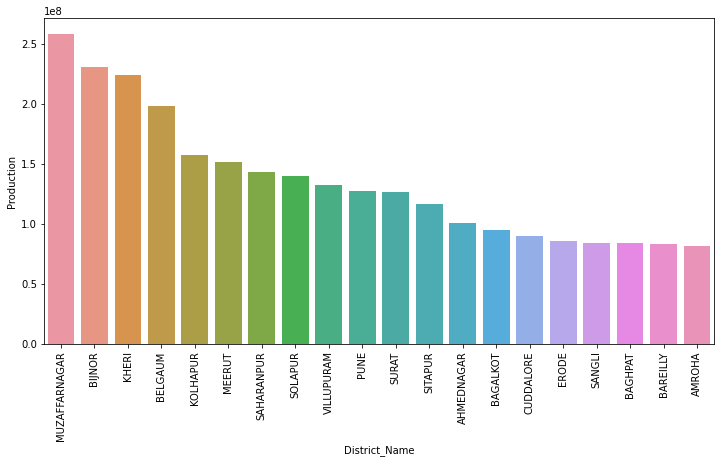

In [67]:
plt.figure(figsize=(12,6))
sns.barplot("District_Name","Production",data=top_sug[:20])
plt.xticks(rotation=90)
plt.show()

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


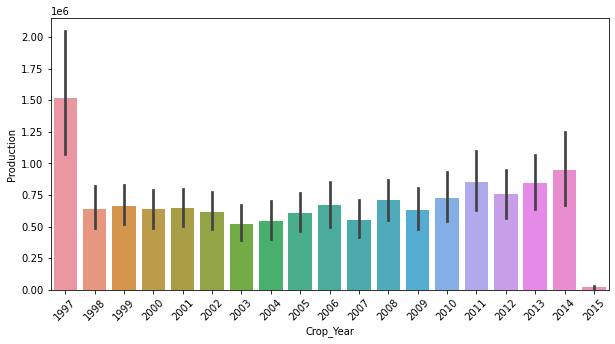

In [53]:
plt.figure(figsize=(10,5))
sns.barplot("Crop_Year","Production",data=sug)
plt.xticks(rotation=45)
plt.show()

In 1997 the sugarcane is on its peak

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


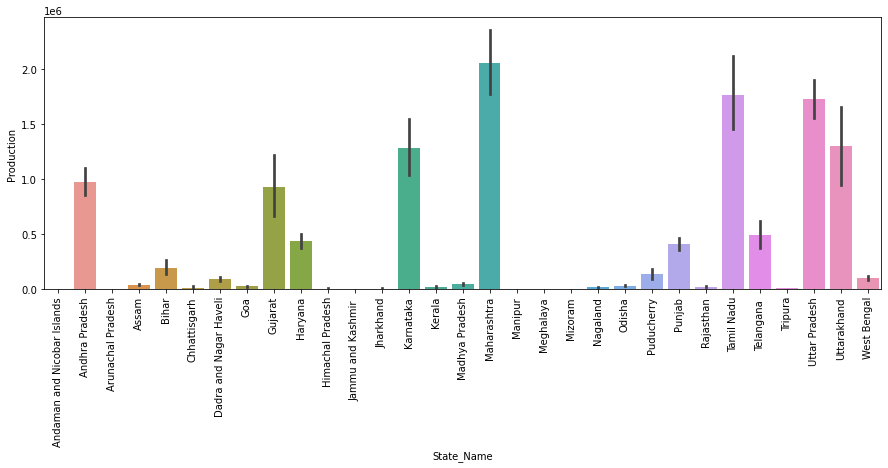

In [54]:
plt.figure(figsize=(15,5))
sns.barplot("State_Name","Production",data=sug)
plt.xticks(rotation=90)
plt.show()

As we can see that again the Maharashtra growing highest number of sugarcane

C:\Users\Manis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


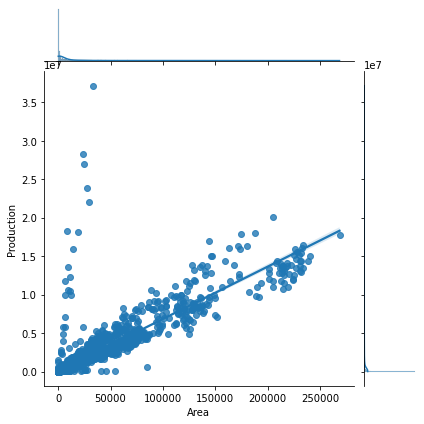

In [55]:
sns.jointplot("Area","Production",data=sug,kind='reg')

It is correlated but not much 

# Results from EDA

                   crop production
          
In this dataset there are 7 columns and 246091 rows.

This dataset also contain 3730 missing values in production column which means it is 1% of dataset so we have droped it.

There is no correaltion in the dataset.

There are lots of state_name given in the dataset and when we check which state has  highest we find kerala.

So we have lost of state we have categorised that state to zone wise - 'Union Terr' 'South Zone' 'NE Zone' 'East Zone' 'North Zone' 'Central Zone' 'West Zone'.

So we have lots of crops name also we have also actegorised it to cat_crop - Nuts' 'Pulses' 'Cereal' 'Fruits' None 'spices' 'Commercial' 'Vegetables''oilseeds' 'fibres' 'Beans



highest production year are 2011,2013,2014.

Uttar Pradesh  producing more crop categories than any other Indian state.


It shows that rice needs winter to grow.

District wise its BARDHAMAN, MEDINIPUR WEST and WEST GODAVARI which contributes to total rice production.


There is highest production in 2014 for Rice.

Statewise Punjab dominates in Rice production.




When we check the frequency of the crop it shows rice is grown heavily in India

The production of coconut is accurs whole year, highest production year is 2014 and lowest is 2002, kerala has the highest production of coconuts , as per district wise kozhikode has highest production.

We we check the graph we found there is lesser correaltion, because as the area increase the production  still zero.


sugarcane is kharif crop in 1997 the production of  sugarcane is on its peak ,Maharashtra is the  highest producer of sugarcane.





# Conclusion

Here i have come to end of the project on the topic crop production 

I would like to share my experience while doing this project i learnt  many new things  about the crop production and its was a wonderfull learning experience for me while working on this projects 

This project develops my thinking skills